In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scikit_posthocs import posthoc_dunn

In [3]:


# Charger le fichier pour examiner sa structure
file_path = 'dermatology_cleaned.csv'
data = pd.read_csv(file_path)

# Examiner les premières lignes et les informations générales du fichier
data_info = data.info()
data_head = data.head()
data_description = data.describe(include='all').T

data_info, data_head, data_description


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   erythema                                  366 non-null    int64
 1   scaling                                   366 non-null    int64
 2   definite_borders                          366 non-null    int64
 3   itching                                   366 non-null    int64
 4   koebner_phenomenon                        366 non-null    int64
 5   polygonal_papules                         366 non-null    int64
 6   follicular_papules                        366 non-null    int64
 7   oral_mucosal_involvement                  366 non-null    int64
 8   knee_and_elbow_involvement                366 non-null    int64
 9   scalp_involvement                         366 non-null    int64
 10  family_history                            366 non-null    int6

(None,
    erythema  scaling  definite_borders  itching  koebner_phenomenon  \
 0         2        2                 0        3                   0   
 1         3        3                 3        2                   1   
 2         2        1                 2        3                   1   
 3         2        2                 2        0                   0   
 4         2        3                 2        2                   2   
 
    polygonal_papules  follicular_papules  oral_mucosal_involvement  \
 0                  0                   0                         0   
 1                  0                   0                         0   
 2                  3                   0                         3   
 3                  0                   0                         0   
 4                  2                   0                         2   
 
    knee_and_elbow_involvement  scalp_involvement  ...  focal hypergranulosis  \
 0                           1                  0 

Description des données
Structure des données :

Nombre d'entrées : 366
Nombre de colonnes : 34
Toutes les colonnes sont de type int64 (variables numériques discrètes).
Colonnes principales :

Les attributs cliniques (par exemple : erythema, scaling, itching) et histopathologiques (par exemple : melanin incontinence, eosinophils in the infiltrate).
La variable Class représente le type de maladie de peau et prend des valeurs de 1 à 6.
Statistiques descriptives générales :

Les valeurs des variables sont discrètes, avec des minimums et maximums allant de 0 à 3 (dans la majorité des cas).
La moyenne et l'écart-type varient, indiquant une certaine diversité dans les valeurs.

Pour mener cette analyse descriptive avec visualisations et interprétations, nous allons suivre ces étapes :

### Étape 1 : Visualisation des distributions des variables
1. **Distribution de la variable cible (`Class`)** : Pour comprendre comment les types de maladies sont répartis.
2. **Distribution des variables cliniques principales** : Visualiser les données continues ou discrètes sous forme d’histogrammes ou de diagrammes en boîte pour repérer les tendances générales.
3. **Distribution des variables histopathologiques** : Comprendre leur répartition et identifier les caractéristiques distinctives.

### Étape 2 : Exploration des corrélations initiales
1. **Matrice de corrélation** : Calculer les corrélations entre toutes les variables pour identifier les relations fortes.
2. **Analyse spécifique des corrélations avec `Class`** : Examiner quelles variables (cliniques ou histopathologiques) sont fortement liées au type de maladie.



In [4]:
# Séparer les données en attributs cliniques, histopathologiques et cible
clinical_features = data.iloc[:, 0:11]
clinical_features.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history
0,2,2,0,3,0,0,0,0,1,0,0
1,3,3,3,2,1,0,0,0,1,1,1
2,2,1,2,3,1,3,0,3,0,0,0
3,2,2,2,0,0,0,0,0,3,2,0
4,2,3,2,2,2,2,0,2,0,0,0


In [5]:
histopathological_features = data.iloc[:, 11:33]
histopathological_features.head()

,melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing of the rete ridges,elongation of the rete ridges,...,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate
0,0,0,0,0,3,2,0,0,0,0,...,0,0,0,0,3,0,0,0,1,0
1,0,0,1,0,1,2,0,2,2,2,...,1,0,0,0,0,0,0,0,1,0
2,1,0,0,0,1,2,0,2,0,0,...,0,2,0,2,3,2,0,0,2,3
3,0,0,3,0,0,2,0,3,2,2,...,0,0,3,0,0,0,0,0,3,0
4,1,0,0,0,1,2,0,0,0,0,...,0,2,2,3,2,3,0,0,2,3


In [6]:
data['Class'].head()

0    2
1    1
2    3
3    1
4    3
Name: Class, dtype: int64

In [7]:

clinical_features_copy = clinical_features.copy()
clinical_features_copy.loc[:, 'Class'] = data['Class']

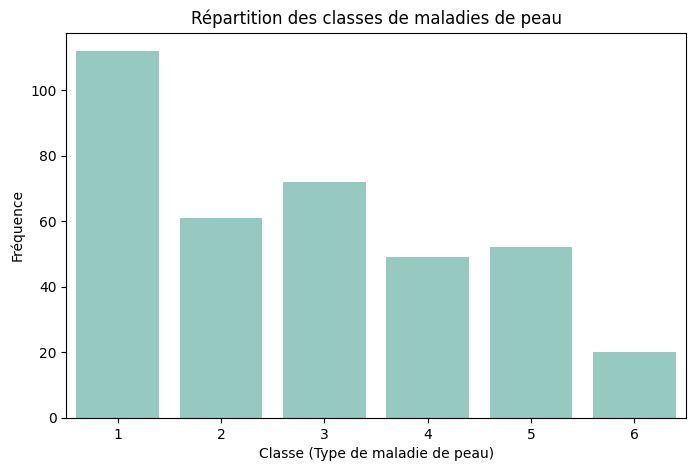

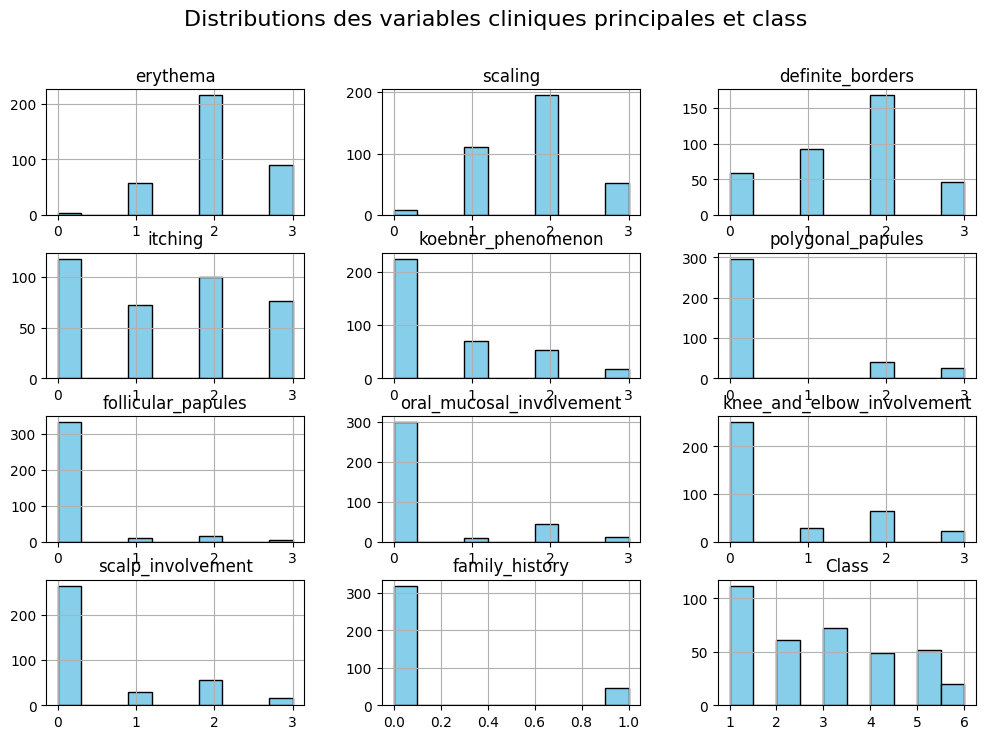

In [9]:
# Visualisation de la répartition de la variable 'Class' avec seaborn
plt.figure(figsize=(8, 5))
sns.set_palette("Set3")
sns.countplot(data=data, x='Class', legend=False)
plt.title('Répartition des classes de maladies de peau')
plt.xlabel('Classe (Type de maladie de peau)')
plt.ylabel('Fréquence')
plt.savefig('Repartition_classes.png', format='png')
plt.show()

# Histogrammes des variables cliniques principales et variable cible
data[clinical_features_copy.columns].hist(figsize=(12, 8), bins=10, color='skyblue', edgecolor='black')
plt.suptitle('Distributions des variables cliniques principales et class', fontsize=16)
plt.savefig('Distributions_variables_cliniques_class.png', format='png')
plt.show()

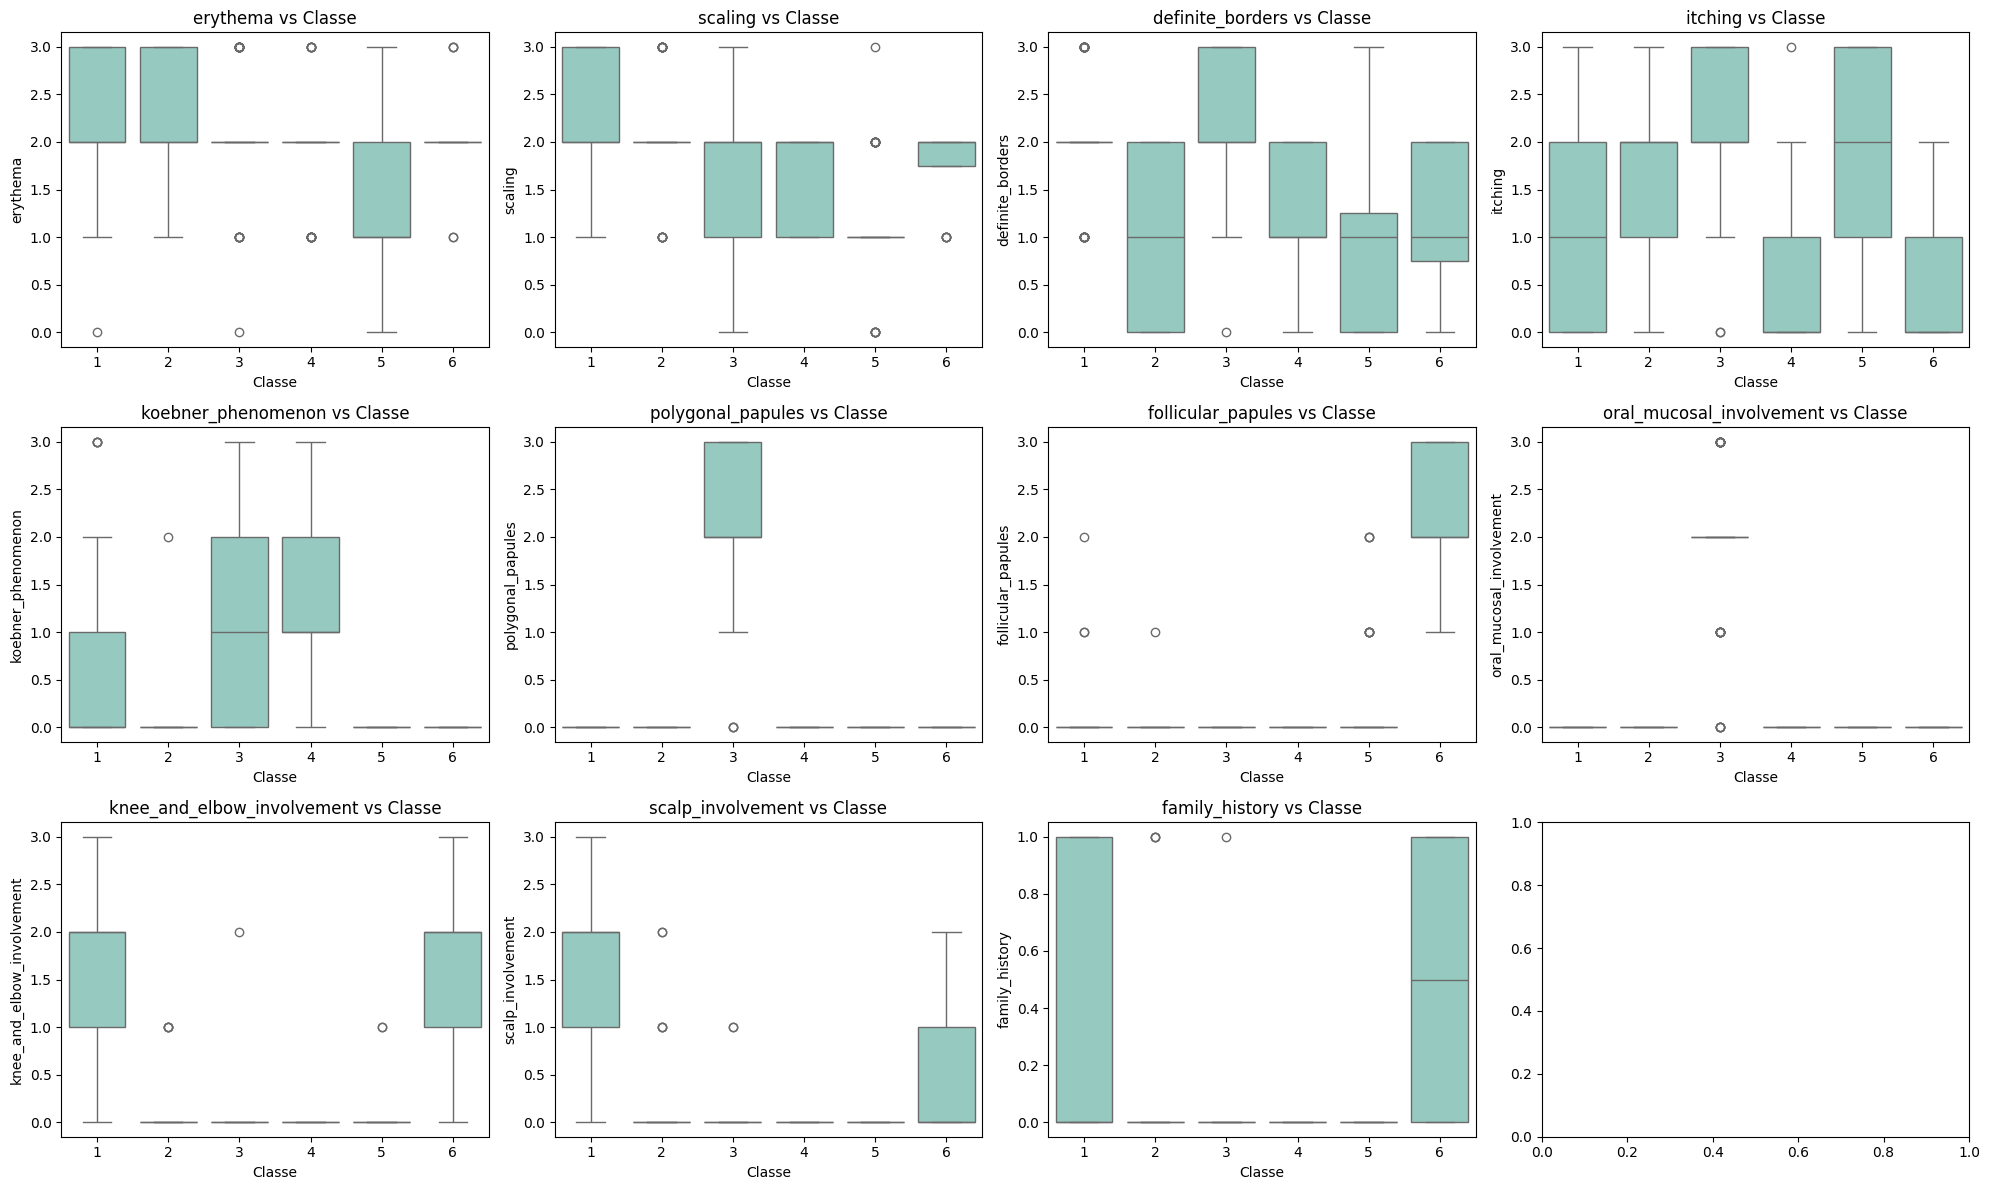

In [15]:
# Boxplot pour étudier les relations entre les attributs cliniques et la classe
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(clinical_features.columns):
    sns.set_palette("Set3")
    sns.boxplot(data=data, x='Class', y=col, ax=axes[i])
    axes[i].set_title(f"{col} vs Classe")
    axes[i].set_xlabel("Classe")
    axes[i].set_ylabel(col)
plt.savefig('boxplot_distribution.png', format='png')
plt.tight_layout()
plt.show()

In [13]:
# Corrélations des attributs cliniques entre eux et variable cible
clinical_corr = clinical_features_copy.corr()
clinical_corr

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,Class
erythema,1.000000,0.435467,0.260087,-0.047623,0.000694,0.033571,-0.109550,-0.026810,0.141008,0.186684,0.172059,-0.335537
scaling,0.435467,1.000000,0.357987,-0.084197,-0.010576,-0.075035,-0.092400,-0.082969,0.298398,0.301577,0.181491,-0.468688
definite_borders,0.260087,0.357987,1.000000,-0.062564,0.241342,0.327754,-0.166662,0.286684,0.302309,0.268862,0.115844,-0.391974
itching,-0.047623,-0.084197,-0.062564,1.000000,0.267878,0.409696,-0.144825,0.359163,-0.299645,-0.155639,-0.136615,0.054772
koebner_phenomenon,0.000694,-0.010576,0.241342,0.267878,1.000000,0.394108,-0.172741,0.392554,-0.066372,0.015202,-0.083247,-0.091323
polygonal_papules,0.033571,-0.075035,0.327754,0.409696,0.394108,1.000000,-0.137093,0.865142,-0.276058,-0.253234,-0.151841,0.057785
follicular_papules,-0.109550,-0.092400,-0.166662,-0.144825,-0.172741,-0.137093,1.000000,-0.132394,0.222255,-0.003535,0.192866,0.477813
oral_mucosal_involvement,-0.026810,-0.082969,0.286684,0.359163,0.392554,0.865142,-0.132394,1.000000,-0.283466,-0.259813,-0.151825,0.055805
knee_and_elbow_involvement,0.141008,0.298398,0.302309,-0.299645,-0.066372,-0.276058,0.222255,-0.283466,1.000000,0.659206,0.341915,-0.383305
scalp_involvement,0.186684,0.301577,0.268862,-0.155639,0.015202,-0.253234,-0.003535,-0.259813,0.659206,1.000000,0.292728,-0.533208


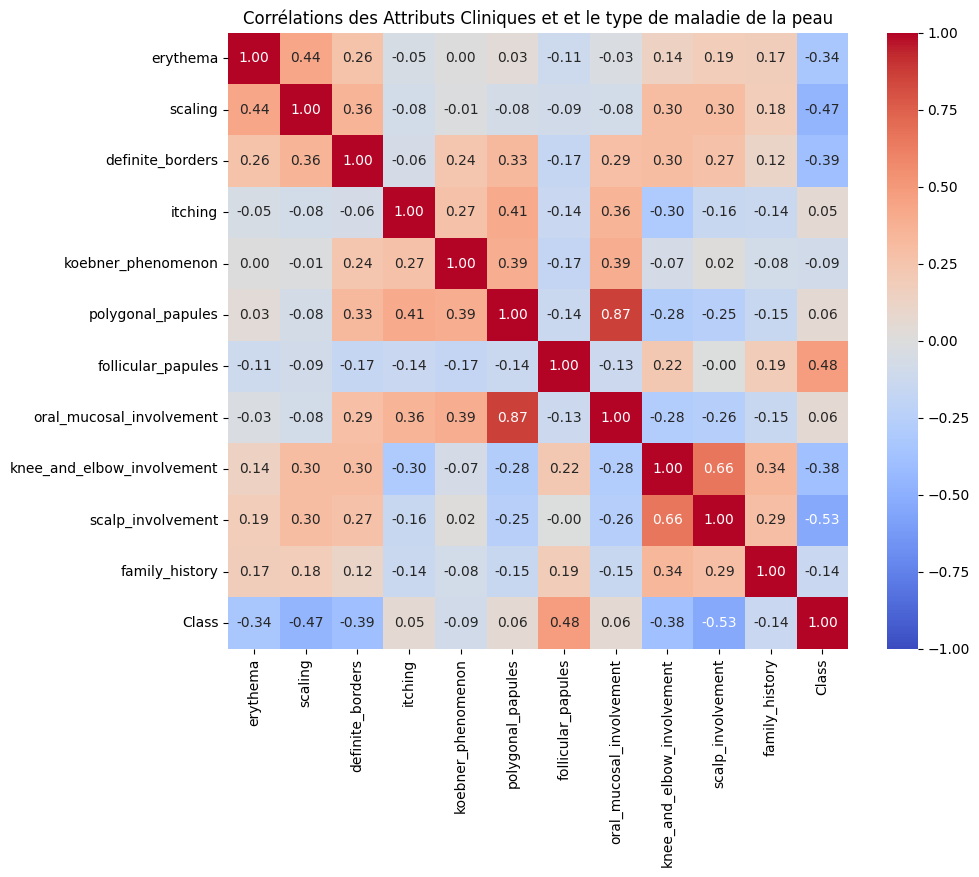

In [16]:

# Visualisation
plt.figure(figsize=(10, 8))
sns.heatmap(clinical_corr, annot=True, fmt=".2f", cmap="coolwarm",vmin=-1, vmax=1)
plt.title("Corrélations des Attributs Cliniques et et le type de maladie de la peau")
plt.savefig('correlation_matrix.png', format='png')
plt.show()


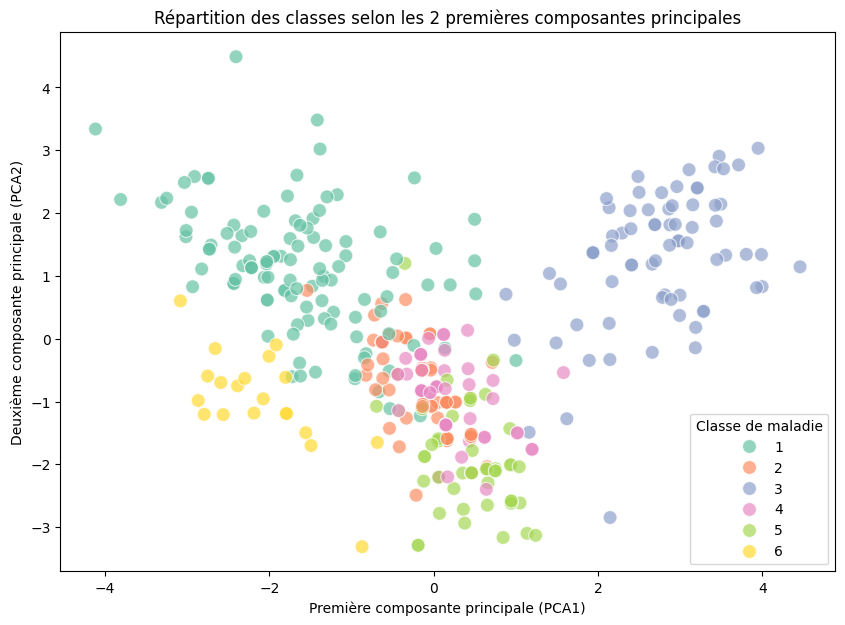

(array([0.27323148, 0.20799652, 0.10768017, 0.08869983, 0.07801352,
        0.06261912, 0.05808002, 0.04952975, 0.03681681, 0.02570759,
        0.01162518]),
 array([[-0.12731201, -0.2079636 , -0.00784007,  0.33124415,  0.25255016,
          0.44189562, -0.15691788,  0.44086968, -0.39978735, -0.35061118,
         -0.26449555],
        [ 0.34141677,  0.3823497 ,  0.52233912,  0.07469134,  0.28829088,
          0.30119293, -0.16327096,  0.27613154,  0.25851554,  0.29746116,
          0.16364005],
        [-0.41449869, -0.33811698,  0.04483173,  0.01596444,  0.17227723,
          0.19728011,  0.60989959,  0.22053078,  0.316195  ,  0.13968019,
          0.3207849 ],
        [ 0.45540944,  0.21831559, -0.06280362, -0.02010273, -0.38959082,
          0.17748633,  0.44586603,  0.15522745, -0.21110376, -0.40264165,
          0.35739692],
        [ 0.13763234,  0.04573435, -0.40402631,  0.74620388,  0.18938458,
         -0.12064634, -0.04494485, -0.16395882, -0.04222852,  0.20569269,
          

In [48]:

# Sélectionner les variables cliniques pour l'ACP
clinique_data = data[clinical_features.columns]

# Normalisation des données
scaler = StandardScaler()
clinique_scaled = scaler.fit_transform(clinique_data)

# Appliquer l'ACP (on garde un nombre suffisant de composantes principales pour expliquer la variance)
pca = PCA()
pca.fit(clinique_scaled)

# Calculer la variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_

# Composantes principales
pca_components = pca.components_

# Projeter les données dans le nouvel espace (les premières 2 composantes principales)
pca_2d = pca.transform(clinique_scaled)[:, :2]

# Ajouter les résultats à la dataframe pour la visualisation
data_pca = data.copy()
data_pca['PCA1'] = pca_2d[:, 0]
data_pca['PCA2'] = pca_2d[:, 1]

# Visualiser les 2 premières composantes principales (PCA1 et PCA2) colorées selon 'Class'
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Class', data=data_pca, palette='Set2', s=100, alpha=0.7)
plt.title("Répartition des classes selon les 2 premières composantes principales")
plt.xlabel("Première composante principale (PCA1)")
plt.ylabel("Deuxième composante principale (PCA2)")
plt.legend(title="Classe de maladie")
plt.show()

# Afficher la variance expliquée et les premières composantes
explained_variance, pca_components[:5]  # Montrer les 5 premières composantes principales et la variance expliquée


   Composante  Valeur propre  Variance expliquée (%)  Variance cumulée (%)
0         PC1       3.013781               27.323148             27.323148
1         PC2       2.294230               20.799652             48.122800
2         PC3       1.187727               10.768017             58.890817
3         PC4       0.978371                8.869983             67.760800
4         PC5       0.860500                7.801352             75.562152
5         PC6       0.690697                6.261912             81.824064
6         PC7       0.640631                5.808002             87.632066
7         PC8       0.546320                4.952975             92.585041
8         PC9       0.406094                3.681681             96.266722
9        PC10       0.283558                2.570759             98.837482
10       PC11       0.128227                1.162518            100.000000


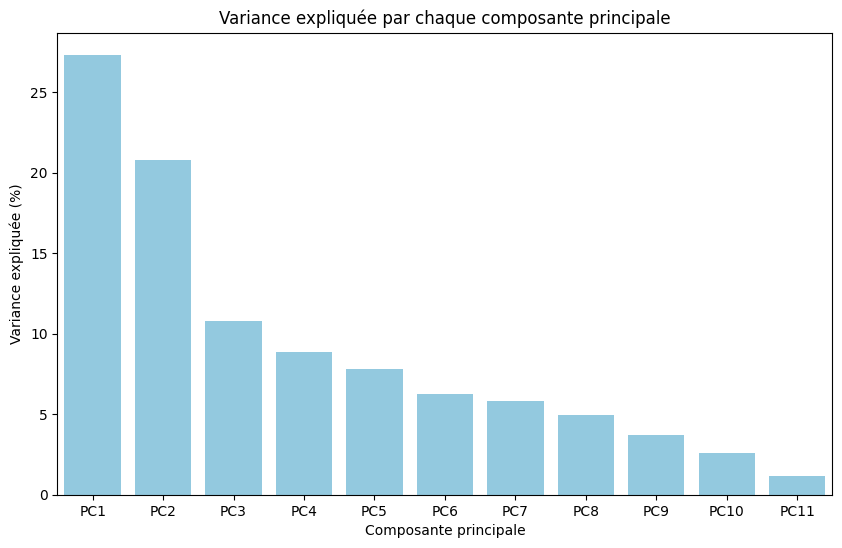

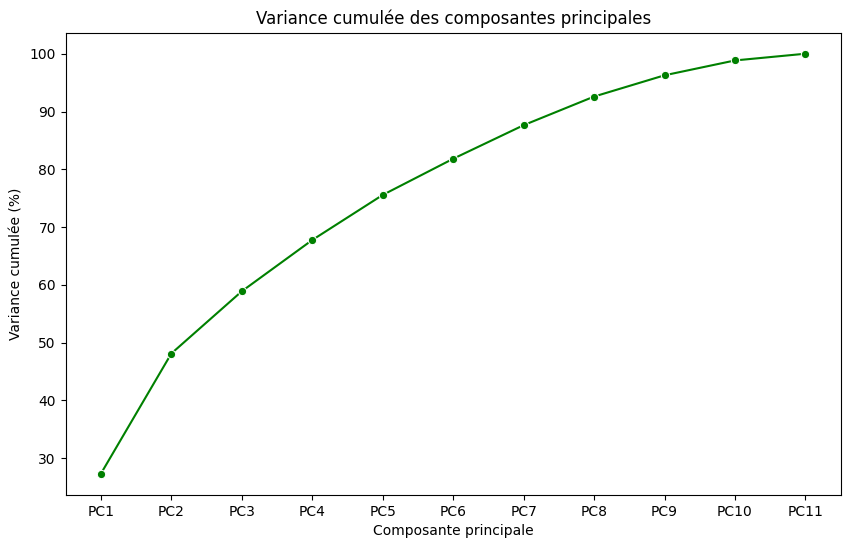

In [54]:

# Extraire les valeurs propres et la variance expliquée
explained_variance = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

# Calcul de la variance cumulée
cumulative_variance = explained_variance.cumsum()
cumulative_eigenvalues = eigenvalues.cumsum()
# Créer un tableau pour afficher les résultats
pca_summary = pd.DataFrame({
    'Composante': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Valeur propre': eigenvalues,
    'Variance expliquée (%)': explained_variance * 100,
    'Variance cumulée (%)': cumulative_variance * 100
    
})

# Afficher le tableau
print(pca_summary)

# Affichage graphique de la variance expliquée
plt.figure(figsize=(10, 6))

# Bar chart pour la variance expliquée par chaque composante
sns.barplot(x='Composante', y='Variance expliquée (%)', data=pca_summary, color='skyblue')
plt.title("Variance expliquée par chaque composante principale")
plt.xlabel('Composante principale')
plt.ylabel('Variance expliquée (%)')
plt.show()

# Graphique de la variance cumulée
plt.figure(figsize=(10, 6))
sns.lineplot(x='Composante', y='Variance cumulée (%)', data=pca_summary, marker='o', color='green')
plt.title("Variance cumulée des composantes principales")
plt.xlabel('Composante principale')
plt.ylabel('Variance cumulée (%)')
plt.show()


In [59]:


# Initialisation d'une liste pour stocker les résultats
results = []

# Test de Shapiro-Wilk pour chaque colonne
for column in clinical_features.columns:
    stat, p_value = stats.shapiro(clinical_features[column])
    normality = "Normale" if p_value >= 0.05 else "Non Normale"
    results.append({'Variable': column, 'Statistique': stat, 'p-valeur': p_value, 'Normalité': normality})

# Conversion des résultats en DataFrame
results_df = pd.DataFrame(results)

# Affichage des résultats
print(results_df)


                      Variable  Statistique      p-valeur    Normalité
0                     erythema     0.799724  6.184977e-21  Non Normale
1                      scaling     0.826619  1.458711e-19  Non Normale
2             definite_borders     0.860934  1.466788e-17  Non Normale
3                      itching     0.842471  1.119304e-18  Non Normale
4           koebner_phenomenon     0.706122  7.888281e-25  Non Normale
5            polygonal_papules     0.501966  9.103715e-31  Non Normale
6           follicular_papules     0.320918  1.427639e-34  Non Normale
7     oral_mucosal_involvement     0.493324  5.678503e-31  Non Normale
8   knee_and_elbow_involvement     0.643548  6.341568e-27  Non Normale
9            scalp_involvement     0.608576  5.677120e-28  Non Normale
10              family_history     0.388368  2.912236e-33  Non Normale


In [60]:

stat, p_value = stats.shapiro(data['Class'])
print(f"{'Class'}: Statistique={stat}, p-valeur={p_value}")
if p_value < 0.05:
    print(f"La variable {'Class'} ne suit PAS une distribution normale.")
else:
    print(f"La variable {'Class'} suit une distribution normale.")

Class: Statistique=0.8824100404355387, p-valeur=4.0830501995453e-16
La variable Class ne suit PAS une distribution normale.


In [63]:
 #Test de Kruskal-Wallis
kruskal_results = {}
for attribute in clinical_features.columns :
    h_value, p_value = stats.kruskal(
        *[data[data['Class'] == cls][attribute] for cls in data['Class'].unique()]
    )
    kruskal_results[attribute] = {"H-value": h_value, "p_value": p_value}

# Résultats de Kruskal-Wallis
kruskal_results_df = pd.DataFrame(kruskal_results).T
kruskal_results_df.columns = ['H-value', 'p-value']
print("Résultats Kruskal-Wallis :")
print(kruskal_results_df)

Résultats Kruskal-Wallis :
                               H-value       p-value
erythema                     58.469269  2.516847e-11
scaling                     104.023089  7.492906e-21
definite_borders            139.721910  2.050120e-28
itching                     117.406650  1.111416e-23
koebner_phenomenon          145.705981  1.094697e-29
polygonal_papules           342.605633  6.838172e-72
follicular_papules          237.035914  3.317647e-49
oral_mucosal_involvement    330.863638  2.301961e-69
knee_and_elbow_involvement  244.743220  7.377044e-51
scalp_involvement           222.553057  4.217237e-46
family_history               77.348485  3.007594e-15


In [70]:
# Appliquer le test de Dunn sur chaque variable clinique
posthoc_results = {}
significant_vars = clinical_features.columns  # Variables analysées

for var in significant_vars:
    posthoc = posthoc_dunn(data, val_col=var, group_col='Class', p_adjust='bonferroni')
    posthoc_results[var] = posthoc


selected_var = significant_vars[0]  # Remplacez par une variable de votre choix
print(f"Résultats du test post-hoc Dunn pour la variable : {selected_var}")
print(posthoc_results[selected_var])

Résultats du test post-hoc Dunn pour la variable : erythema
              1             2         3         4             5         6
1  1.000000e+00  1.000000e+00  0.537009  0.004625  5.606683e-11  1.000000
2  1.000000e+00  1.000000e+00  1.000000  0.028007  1.998651e-08  1.000000
3  5.370092e-01  1.000000e+00  1.000000  1.000000  4.672506e-05  1.000000
4  4.625158e-03  2.800715e-02  1.000000  1.000000  8.912427e-02  1.000000
5  5.606683e-11  1.998651e-08  0.000047  0.089124  1.000000e+00  0.048932
6  1.000000e+00  1.000000e+00  1.000000  1.000000  4.893200e-02  1.000000


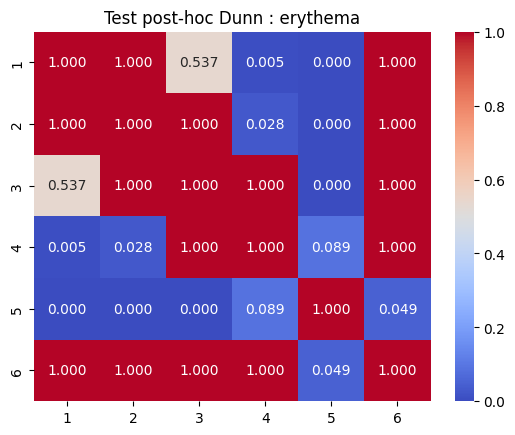

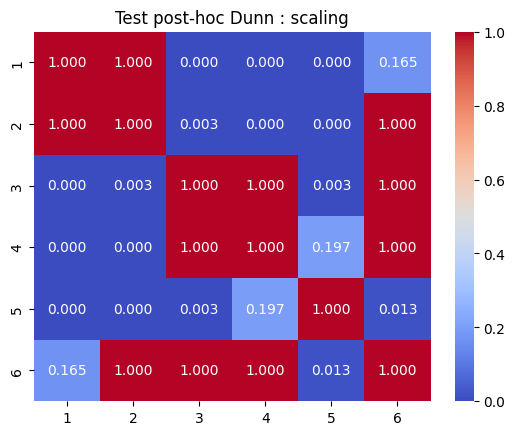

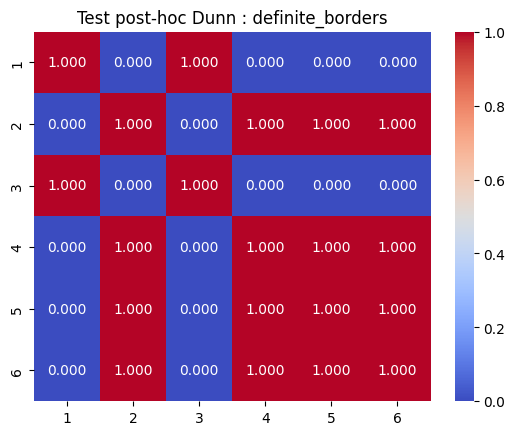

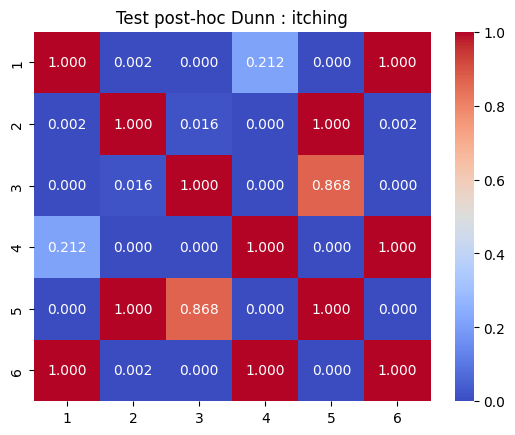

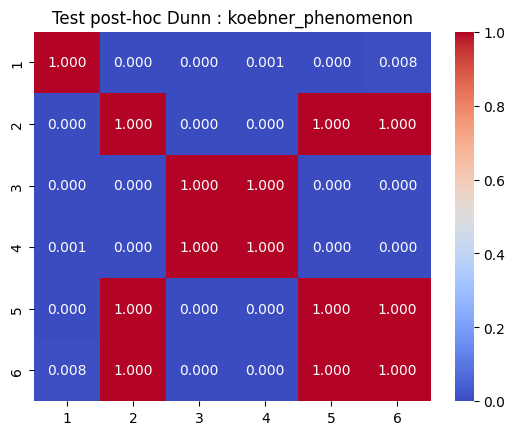

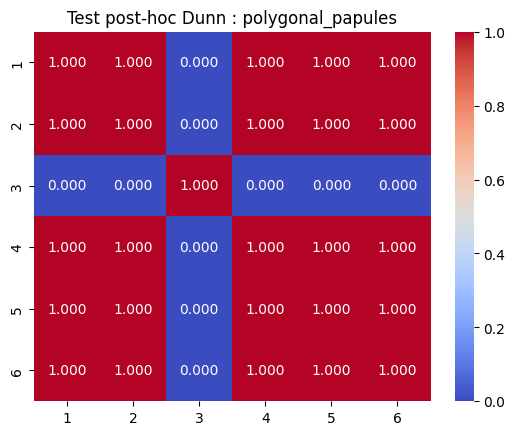

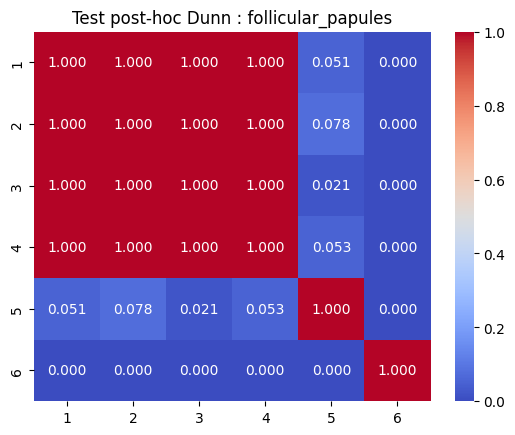

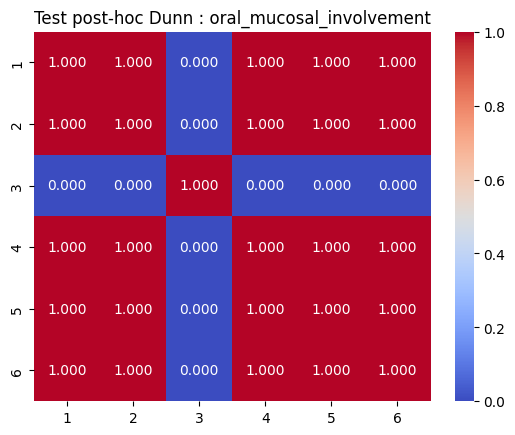

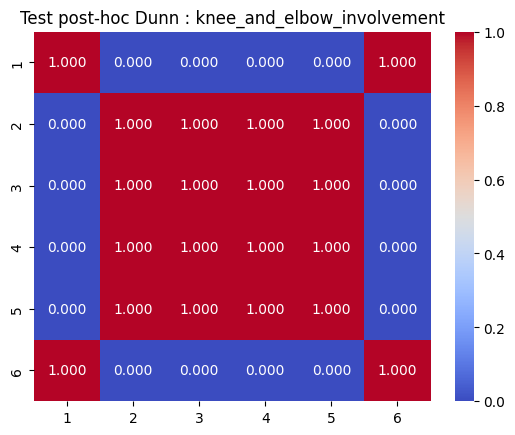

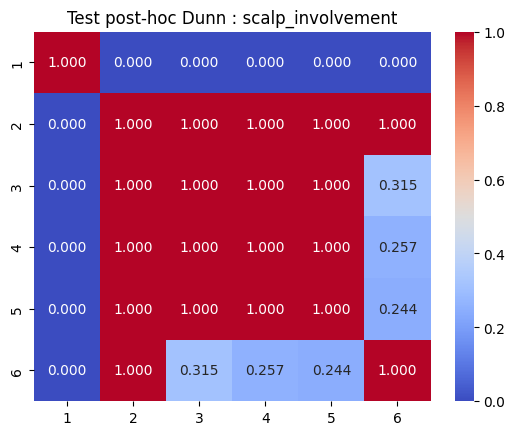

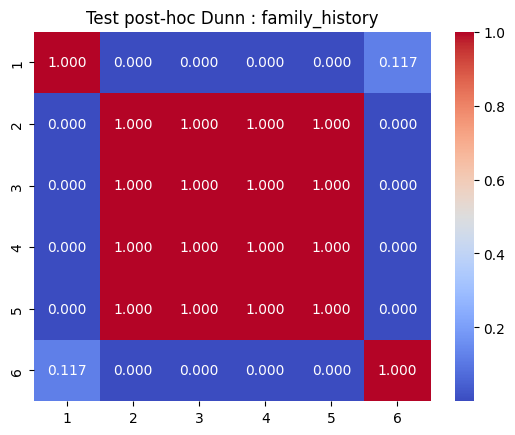

In [74]:

for i in range(11):
    var = significant_vars[i]
    sns.heatmap(posthoc_results[var], annot=True, fmt=".3f", cmap="coolwarm")
    plt.title(f"Test post-hoc Dunn : {var}")
    plt.show()
